In [39]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Input, Dense, LSTM
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
%matplotlib inline
from keras.layers.core import Flatten
from keras.layers.core import Dense
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8

In [2]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

### Sequential model is used for Recurrent Neural Network. 
<b>You can create a Sequential model by passing a list of layer instances to the constructor</b>

#### Initialising the RNN model

In [3]:
regressor = Sequential()

#### Using Training data set for training the model.

In [4]:
df = pd.read_csv("../Data/training.csv")

In [5]:
df.head()

Unnamed: 0  Unnamed: 0.1         id              brand  \
0       33641         33668  824085496             Disney   
1       25378         25395  646672850  Warner Home Video   
2       50575         50608  114557595               Tide   
3       47514         47547  246140130         Neutrogena   
4       26556         26573  133127652               Ragu   

                                          categories             dateAdded  \
0  Movies, Music & Books,Ways To Shop Entertainme...  2016-12-28T22:31:24Z   
1  Movies, Music & Books,Movies,Action & Adventur...  2016-07-26T21:32:40Z   
2  Household Essentials,Ways To Shop,Household Es...  2015-10-29T11:28:10Z   
3  Personal Care,Medicine Cabinet,Skin Fading/Lig...  2015-11-06T13:51:37Z   
4  Food,Packaged Foods,Condiments, Dips, & Salad ...  2015-10-23T06:36:30Z   

            dateUpdated          ean  \
0  2018-02-05T08:36:37Z          NaN   
1  2018-02-05T10:22:44Z          NaN   
2  2018-02-05T08:35:12Z          NaN   
3  2018-02-05T11:28:49Z          NaN   
4  2018-02-05T11:25:54Z  36200014011   

                                                keys      manufacturer  \
0  786936850628,disney/50978083,junglebookblurayd...       Buena Vista   
1  warnerhomevideo/15773884,883929388448,godzilla...              Test   
2  037000138822,tide/13918059,tideoriginalscentli...  Procter & Gamble   
3  070501110362,neutrogenarapidtonerepairdarkspot...        Neutrogena   
4  ragutraditionalpastasauce/b0035n3ads,ragutradi...          Unilever   

                ...                 reviews_id reviews.numHelpful rating  \
0               ...                        NaN                0.0      5   
1               ...                        NaN                0.0      5   
2               ...                        NaN                NaN      5   
3               ...                 97088378.0                NaN      5   
4               ...                107524410.0                0.0      5   

                                          sourceURLs  \
0  http://reviews.bestbuy.com/3545/5094600/review...   
1  http://reviews.bestbuy.com/3545/6435036/review...   
2  https://redsky.target.com/groot-domain-api/v1/...   
3  https://www.walmart.com/reviews/product/350433...   
4   https://www.walmart.com/reviews/product/10291073   

                                                text  \
0  Visually this is fantastic & it stays true to ...   
1  Finally! A Godzilla movie that was made true t...   
2  Waited until I washed my husbands white dress ...   
3  Riding through the desert with cowboys, and ju...   
4  This is how i like my sauce, if i want eat veg...   

                                               title  userCity  userProvince  \
0              The live action version of a classic.        UK           NaN   
1  The best Godzilla movie we have been waiting for!        UK           NaN   
2                                         Impressed!     China           NaN   
3                                     Turn Back Time     China           NaN   
4                     This is great sauxce and cheap     Japan           NaN   

    username                             upc  
0  539861276                        7.87E+11  
1  585122015                        8.84E+11  
2  647011901                     37000138822  
3  116075470  70,501,110,362,885,100,000,000  
4  555800904                     36200014011  

[5 rows x 26 columns]

In [6]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'brand', 'categories', 'dateAdded',
       'dateUpdated', 'ean', 'keys', 'manufacturer', 'manufacturerNumber',
       'name', 'reviewsdate', 'dateSeen', 'didPurchase', 'doRecommend',
       'reviews_id', 'reviews.numHelpful', 'rating', 'sourceURLs', 'text',
       'title', 'userCity', 'userProvince', 'username', 'upc'],
      dtype='object')

#### Converting boolean values of didPurchase and doRecommend column of data to 0 or 1
#### True is replaced by 1 and False is replaced by 0

In [7]:
df.didPurchase = (df.didPurchase)*1

In [8]:
df.doRecommend = (df.doRecommend)*1

In [9]:
df['doRecommend']

0          1
1          1
2          1
3          1
4          1
5          1
6          1
7        NaN
8          1
9          1
10         1
11         1
12         1
13         1
14         1
15         1
16       NaN
17         1
18         1
19         1
20         1
21       NaN
22         1
23         0
24         1
25         1
26         1
27         1
28         1
29         1
        ... 
56772      1
56773      1
56774      0
56775      1
56776    NaN
56777      1
56778      1
56779      1
56780      0
56781    NaN
56782      1
56783      1
56784      1
56785    NaN
56786      1
56787      1
56788      1
56789      1
56790      1
56791      1
56792      1
56793      1
56794      1
56795      1
56796      1
56797      1
56798      0
56799      1
56800      1
56801      1
Name: doRecommend, Length: 56802, dtype: object

In [10]:
df['doRecommend'] = df['doRecommend'].fillna(1)

In [11]:
df['doRecommend'] 

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       0
24       1
25       1
26       1
27       1
28       1
29       1
        ..
56772    1
56773    1
56774    0
56775    1
56776    1
56777    1
56778    1
56779    1
56780    0
56781    1
56782    1
56783    1
56784    1
56785    1
56786    1
56787    1
56788    1
56789    1
56790    1
56791    1
56792    1
56793    1
56794    1
56795    1
56796    1
56797    1
56798    0
56799    1
56800    1
56801    1
Name: doRecommend, Length: 56802, dtype: int64

#### id,username,rating, doRecommend and didPurchase columns are used for this model which is stored din trainig_set

In [12]:
training_set = df[['id','username','rating','doRecommend','didPurchase']]

In [13]:
training_set['didPurchase'] = training_set['didPurchase'].fillna(1)

In [14]:
training_set.head()

id   username  rating  doRecommend  didPurchase
0  824085496  539861276       5            1            1
1  646672850  585122015       5            1            1
2  114557595  647011901       5            1            1
3  246140130  116075470       5            1            0
4  133127652  555800904       5            1            0

In [15]:
training_set = training_set.iloc[:, 2:3].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

#### 1000 rows are taken in x_train and y_train

In [16]:
# Getting the inputs and the ouputs
x_train =  training_set[0:999]
y_train = training_set[1:1000]


In [17]:
print(y_train.shape)
print(x_train.shape)

(999, 1)
(999, 1)


#### Reshaping the x_train and y_train to fit in RNN model

In [18]:
# Reshaping
x_train = x_train.reshape(999,1,1)
print(x_train.shape)
# Reshaping
#y_train = y_train.reshape(999,4,1)
print(y_train.shape)

(999, 1, 1)
(999, 1)


### We have used LSTM (Long Short term Memory Networks) which is a special kind of RNN which are designed to avoid 
#### Long term dependency problem

In [19]:
# Adding the input layer and the LSTM layer
regressor.add(LSTM(12, activation='relu', input_shape=(None,1)))
regressor.add(Dense(8, activation='softmax'))
# Adding the output layer
regressor.add(Dense(1))
# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, batch_size=20, epochs=200)

Epoch 1/200
999/999 [==============================] - 1s 1ms/step - loss: 0.6604
Epoch 2/200
999/999 [==============================] - 0s 155us/step - loss: 0.4798
Epoch 3/200
999/999 [==============================] - 0s 146us/step - loss: 0.3336
Epoch 4/200
999/999 [==============================] - 0s 150us/step - loss: 0.2189
Epoch 5/200
999/999 [==============================] - 0s 147us/step - loss: 0.1398
Epoch 6/200
999/999 [==============================] - 0s 143us/step - loss: 0.0985
Epoch 7/200
999/999 [==============================] - 0s 139us/step - loss: 0.0831
Epoch 8/200
999/999 [==============================] - 0s 144us/step - loss: 0.0788
Epoch 9/200
999/999 [==============================] - 0s 124us/step - loss: 0.0778
Epoch 10/200
999/999 [==============================] - 0s 170us/step - loss: 0.0776
Epoch 11/200
999/999 [==============================] - 0s 132us/step - loss: 0.0775
Epoch 12/200
999/999 [==============================] - 0s 136us/step - loss

999/999 [==============================] - 0s 177us/step - loss: 0.0731
Epoch 193/200
999/999 [==============================] - 0s 212us/step - loss: 0.0733
Epoch 194/200
999/999 [==============================] - 0s 212us/step - loss: 0.0731
Epoch 195/200
999/999 [==============================] - 0s 211us/step - loss: 0.0731
Epoch 196/200
999/999 [==============================] - 0s 202us/step - loss: 0.0731
Epoch 197/200
999/999 [==============================] - 0s 169us/step - loss: 0.0731
Epoch 198/200
999/999 [==============================] - 0s 147us/step - loss: 0.0730
Epoch 199/200
999/999 [==============================] - 0s 207us/step - loss: 0.0731
Epoch 200/200
999/999 [==============================] - 0s 185us/step - loss: 0.0733


In [21]:
# evaluate the model
scores = regressor.evaluate(x_train, y_train)
print("\n%s: %.2f%%" % (regressor.metrics_names, scores*100))

999/999 [==============================] - 0s 236us/step

['loss']: 7.31%


#### Now taking test.csv which contains test data.
#### We have considered the same columns which we have used in train data 
#### We need to check if our model has learned and compare the actual and predicted rating of product

In [22]:
# Making the predictions and visualising the results

test_set = pd.read_csv("../Data/test.csv")
real_test_data = test_set[['id','username','didPurchase','rating']]

In [23]:
real_test_data.shape

(14201, 4)

In [24]:
real_test_data['didPurchase'].fillna(True)

0        False
1        False
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9        False
10        True
11       False
12        True
13       False
14       False
15        True
16       False
17        True
18        True
19        True
20        True
21       False
22        True
23        True
24       False
25        True
26        True
27       False
28        True
29        True
         ...  
14171    False
14172     True
14173    False
14174     True
14175     True
14176     True
14177     True
14178     True
14179     True
14180    False
14181     True
14182     True
14183     True
14184    False
14185     True
14186    False
14187     True
14188    False
14189    False
14190    False
14191     True
14192    False
14193     True
14194     True
14195     True
14196     True
14197     True
14198    False
14199     True
14200     True
Name: didPurchase, Length: 14201, dtype: bool

#### Converting boolean values of didPurchase and doRecommend column of data to 0 or 1
#### True is replaced by 1 and False is replaced by 0

In [25]:
real_test_data.didPurchase = (real_test_data.didPurchase)*1

In [26]:
real_test_data['didPurchase'] = real_test_data['didPurchase'].fillna(1)

In [27]:
real_test_data.head

<bound method NDFrame.head of               id   username  didPurchase  rating
0      838792912  597805296            0       5
1      260262498  895941682            0       5
2      936839005  388693832            1       5
3      824085496  919467472            1       5
4      114557595  318344685            1       5
5       10266246  764512256            1       5
6      778676901  690714001            1       5
7      478474883  874227324            1       5
8       62084754  117784715            1       5
9      478474883  156480169            0       5
10     180780161  814483148            1       5
11     847741680   68810511            0       4
12      77430051  360214950            1       5
13     260262498  448318253            0       5
14     210149299  371651836            0       4
15      10266246  100999132            1       5
16      81907750  859107173            0       5
17     110062780   34938853            1       5
18     657035163  854329281            

In [28]:
real_test_data = real_test_data.head(100)

In [29]:
real_test_data.shape

(100, 4)

In [30]:
# Getting the predicted data
inputs = real_test_data
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (100,4,1))
predicted_data = regressor.predict(inputs)
predicted_data= sc.inverse_transform(predicted_data)
print(predicted_data)

[[3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]
 [3.8286347]

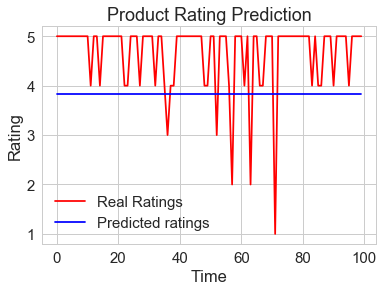

In [31]:
# Visualising the results
plt.plot(real_test_data['rating'], color='red', label='Real Ratings')
plt.plot(predicted_data, color='blue', label='Predicted ratings')
plt.title('Product Rating Prediction')
plt.xlabel('Time')
plt.ylabel('Rating')
plt.legend()
plt.show()

In [32]:
import math
from sklearn.metrics import mean_squared_error
print(real_test_data)
print(predicted_data)
rmse = math.sqrt(mean_squared_error(real_test_data['rating'], predicted_data))
print("RMSE =", rmse)

           id   username  didPurchase  rating
0   838792912  597805296            0       5
1   260262498  895941682            0       5
2   936839005  388693832            1       5
3   824085496  919467472            1       5
4   114557595  318344685            1       5
5    10266246  764512256            1       5
6   778676901  690714001            1       5
7   478474883  874227324            1       5
8    62084754  117784715            1       5
9   478474883  156480169            0       5
10  180780161  814483148            1       5
11  847741680   68810511            0       4
12   77430051  360214950            1       5
13  260262498  448318253            0       5
14  210149299  371651836            0       4
15   10266246  100999132            1       5
16   81907750  859107173            0       5
17  110062780   34938853            1       5
18  657035163  854329281            1       5
19   75176967  905676263            1       5
20  840722277  488534212          

### Simple RNN

#### Using SimpleRNN to check the loss % and compare with LSTM 

In [33]:
from keras.layers.recurrent import SimpleRNN
from keras.layers import Dropout

In [34]:
# Adding the input layer and the LSTM layer
# input_shape=(None, 1) = input_shape=(timestep_count, features_count)
model = Sequential()
model.add(SimpleRNN(128,input_shape = (None,1)))
# Adding the output layer
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid',kernel_initializer='uniform'))


# Compiling the RNN
model.compile(optimizer='adam', loss='binary_crossentropy')

#### Taking first 10000 rows to train the model

In [35]:
y_train = training_set[1:1000]

In [36]:
model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
999/999 [==============================] - 1s 1ms/step - loss: 0.6144
Epoch 2/100
999/999 [==============================] - 0s 119us/step - loss: 0.4943
Epoch 3/100
999/999 [==============================] - 0s 102us/step - loss: 0.4577
Epoch 4/100
999/999 [==============================] - 0s 72us/step - loss: 0.4540
Epoch 5/100
999/999 [==============================] - 0s 118us/step - loss: 0.4551
Epoch 6/100
999/999 [==============================] - 0s 138us/step - loss: 0.4545
Epoch 7/100
999/999 [==============================] - 0s 102us/step - loss: 0.4526
Epoch 8/100
999/999 [==============================] - 0s 91us/step - loss: 0.4527
Epoch 9/100
999/999 [==============================] - 0s 83us/step - loss: 0.4502
Epoch 10/100
999/999 [==============================] - 0s 80us/step - loss: 0.4507
Epoch 11/100
999/999 [==============================] - 0s 90us/step - loss: 0.4484
Epoch 12/100
999/999 [==============================] - 0s 113us/step - loss: 0.4

999/999 [==============================] - 0s 66us/step - loss: 0.4419
Epoch 99/100
999/999 [==============================] - 0s 65us/step - loss: 0.4389
Epoch 100/100
999/999 [==============================] - 0s 66us/step - loss: 0.4400


In [37]:
# evaluate the model
scores = model.evaluate(x_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names, scores*100))

999/999 [==============================] - 0s 133us/step

['loss']: 43.86%


### There is ~44% loss using SimpleRNN.